In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Exercise 2: Linear Interpolation

Find a root of the equation $2x+3\tan(x/4)-e^x=0$ with the linear interpolation method.

In [3]:
def f1(x):
    return 2*x+3*np.tan(x/4) - np.exp(x)

In [4]:

solution = []
solution.append(0.5)
solution.append(1.0)

error_li= [1]  # initialize
error_li.append(solution[1]-solution[0])

it = 1

while error_li[it] > 1e-12 :
    xnew = solution[it] - f1(solution[it])*(solution[it]-solution[it-1])/(f1(solution[it])-f1(solution[it-1]))
    solution.append(xnew)
    
    error_li.append(np.abs(xnew - solution[it]))
    it = it+1

    print('%.d  %.15f  %.15e ' % (it, solution[it], error_li[it]))

N = len(solution)

2  0.925283308823544  7.471669117645552e-02 
3  0.728705139069072  1.965781697544725e-01 
4  0.855118842720232  1.264137036511603e-01 
5  0.837829706411802  1.728913630843054e-02 
6  0.833328042656420  4.501663755381635e-03 
7  0.833557841450805  2.297987943850055e-04 
8  0.833555580527250  2.260923555041927e-06 
9  0.833555579343455  1.183795061976411e-09 
10  0.833555579343461  6.439293542825908e-15 


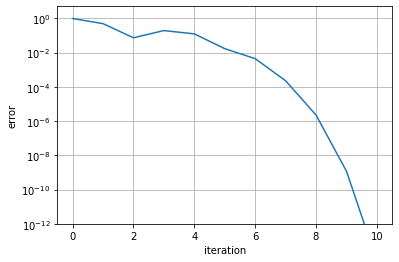

In [5]:
fig, ax = plt.subplots()
ax.plot(np.abs(error_li))
ax.set_yscale('log')
ax.set(xlabel='iteration', ylabel='error')
ax.grid()
plt.ylim(bottom=1e-12)
plt.show()

In [6]:
def df1(x):
    return 2+ 3/(4*(np.cos(x/4))**2) - np.exp(x)

In [7]:
def ddf1(x):
    return (3/8)*np.tan(x/4)/(np.cos(x/4))**2 - np.exp(x)

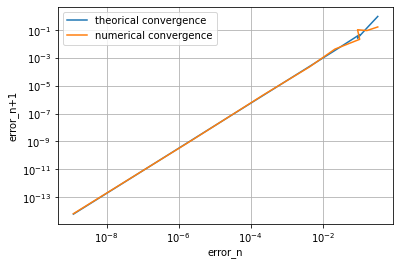

In [8]:
final_solution = solution[N-1]

m = (1+np.sqrt(5))/2

error_n = [None]*N
error_nplus1 = [None]*N
error_nplus1_theory = [None]*N

for i in range (0, N-2):
    error_n[i] = abs(final_solution - solution[i])
    error_nplus1[i] = abs(final_solution - solution[i+1])
    k = pow(abs(ddf1(solution[i+1])/(2*df1(solution[i+1]))),1/m)
    error_nplus1_theory[i] = k*error_n[i]**m

fig, ax = plt.subplots()
ax.plot(error_n, error_nplus1_theory, label='theorical convergence')
ax.plot(error_n,error_nplus1, label='numerical convergence')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set(xlabel='error_n', ylabel='error_n+1')
ax.grid()
plt.legend()
plt.show()